1. Write a program that uses both upward and downward recursion to calculate the spherical Bessel function $j_{l}\left(  x\right)$ for the first 25 $l$ values for $x=0.1,1,10$. Tune your program so that at lease one method gives "good" values (meaning a relative error $\simeq 10^{-10}$).  
    a) Show the convergence and stability of your results.  
    b) Compare the upward and downward recursion methods, printing out $l,$ $j_{l}^{\left(  \text{up}\right)  },$ $j_{l}^{\left(  \text{down}\right)  },$ and the relative difference $\left\vert j_{l}^{\left(  \text{up}\right)
    }-j_{l}^{\left(  \text{down}\right)  }\right\vert \left/  \left(  \left\vert
    j_{l}^{\left(  \text{up}\right)  }\right\vert +\left\vert j_{l}^{\left(
    \text{down}\right)  }\right\vert \right)  \right.$.

In [2]:
#a)
#一些通用的量
import numpy as np
import scipy.special 

x = np.array([0.1,1,10])
jl_real = np.zeros((26,3))

for i in range(len(jl_real)):
    jl_real[i,::] = scipy.special.spherical_jn(i,x)
#计算scipy里的bessel 函数

In [3]:
#down

"""
向下的递归算法总是收敛的，随便取初值，误差也会越来越小，
但是可以看到 递归 表达式的每一项同乘一个系数， 等式依然成立
(c * j_{l-1}(x) ) = (c * (2l + 1)/x j_{l}(x)) - (c * j_{i+1}(x))
所以算出的各项可能差一个系数，除掉就好
"""
j0 = np.sin(x)/x     #标度，用来算出系数

jl_down = np.zeros((100,3))    #要求前25项，那就从前100项开始算
jl_down[99,::] = np.array([0.1,.2,.3])   #随便输入初值 l=99时x=0.1,1,10的贝塞尔函数值
jl_down[98,::] = np.array([.4,.5,.6])    #l=90 时 x=0.1,1,10 的贝塞尔函数值

for l in np.arange(98,0,-1):
    jl_down[l-1,::] = (2*l + 1)/x*jl_down[l,::] - jl_down[ l+1 ,::]  #递推计算

coff = jl_down[0,::] / j0
jl_down /= coff               #计算系数并除掉

print('jl_down = \n{}'.format(jl_down[0:26,::]) )
print('相对误差(与scipy库里相比)=\n{}'.format(abs(jl_down[0:26,::] - jl_real) /jl_real))

jl_down = 
[[ 9.98334166e-01  8.41470985e-01 -5.44021111e-02]
 [ 3.33000119e-02  3.01168679e-01  7.84669418e-02]
 [ 6.66190608e-04  6.20350520e-02  7.79421936e-02]
 [ 9.51851972e-06  9.00658112e-03 -3.94958450e-02]
 [ 1.05772015e-07  1.01101581e-03 -1.05589285e-01]
 [ 9.61631023e-10  9.25611586e-05 -5.55345116e-02]
 [ 7.39754109e-12  7.15693631e-06  4.45013223e-02]
 [ 4.93188748e-14  4.79013420e-07  1.13386231e-01]
 [ 2.90120010e-16  2.82649880e-08  1.25578024e-01]
 [ 1.52698569e-18  1.49137650e-09  1.00096410e-01]
 [ 7.27151100e-21  7.11655264e-11  6.46051545e-02]
 [ 3.16158151e-23  3.09955185e-12  3.55744149e-02]
 [ 1.26465134e-25  1.24166260e-13  1.72159997e-02]
 [ 4.68395367e-28  4.60463768e-15  7.46558448e-03]
 [ 1.61517440e-30  1.58957599e-16  2.94107834e-03]
 [ 5.21029094e-33  5.13268612e-18  1.06354271e-03]
 [ 1.57888971e-35  1.55670827e-19  3.55904074e-04]
 [ 4.51114830e-38  4.45117750e-21  1.10940728e-04]
 [ 1.21923772e-40  1.20385574e-22  3.23884744e-05]
 [ 3.12627012e-43  3

In [4]:
#换一组初值比较其稳定性和正确性
j0 = np.sin(x)/x     

for i in range(10):
    jl_down = np.zeros((100,3))   
    jl_down[99,::] = np.random.rand(3)  #使用随机数作初值
    jl_down[98,::] = np.random.rand(3)

    for l in np.arange(98,0,-1):
        jl_down[l-1,::] = (2*l + 1)/x*jl_down[l,::] - jl_down[ l+1 ,::]  #递推计算

    coff = jl_down[0,::] / j0
    jl_down /= coff               #计算系数

    print('最大相对误差: {}'.format(np.max( abs( jl_down[0:26,::] - jl_real) /jl_real) ) ) #取相对误差最大值输出

最大相对误差: 1.2792502545727565e-14
最大相对误差: 1.3194190354731797e-14
最大相对误差: 1.344255097863502e-14
最大相对误差: 1.3536896597711844e-14
最大相对误差: 1.3022837233241775e-14
最大相对误差: 1.3097085939673459e-14
最大相对误差: 1.3097085939673459e-14
最大相对误差: 1.3194190354731797e-14
最大相对误差: 1.3401669333619353e-14
最大相对误差: 1.285148411175175e-14


In [34]:
# b)
# up递推计算
jl_up = np.zeros((26,3))
jl_up[0,::] = np.sin(x)/x
jl_up[1,::] = np.sin(x)/(x**2) - np.cos(x)/x    #设置递归起点

for i in range(2,26):
    jl_up[i, : : ] = ( 2*(i-1) + 1 )/x * jl_up[i-1,::] - jl_up[i-2,::]  #递归计算
    
relative_error = abs(jl_up - jl_down[0:26,::]) / (abs(jl_up) + abs(jl_down[0:26,::]) )

print(9*' ' + 'l'+ 6*' ' + 'x=0.1'+27*' '+'x = 1' + 27*' '+'x = 10')
for i in range(26):
    print(f'jl_up  : {i}\t{jl_up[i,0]},      \t{jl_up[i,1]},      \t{jl_up[i,2]}')
    print(f'jl_down: {i}\t{jl_down[i,0]},      \t{jl_down[i,1]},      \t{jl_down[i,2]}')
    print(f'rel_err: {i}\t{relative_error[i,0]:<20},      \t{relative_error[i,1]:<20},      \t{relative_error[i,2]}\n')
    

         l      x=0.1                           x = 1                           x = 10
jl_up  : 0	0.9983341664682815,      	0.8414709848078965,      	-0.05440211108893698
jl_down: 0	0.9983341664682814,      	0.8414709848078965,      	-0.05440211108893698
rel_err: 0	5.560377786892211e-17,      	0.0                 ,      	0.0

jl_up  : 1	0.03330001190255594,      	0.30116867893975674,      	0.07846694179875155
jl_down: 1	0.033300011902557575,      	0.3011686789397568,      	0.0784669417987515
rel_err: 1	2.4588263903839228e-14,      	9.215956889454931e-17,      	3.537231728339198e-16

jl_up  : 2	0.0006661906083965663,      	0.062035052011373715,      	0.07794219362856245
jl_down: 2	0.0006661906084455687,      	0.06203505201137386,      	0.07794219362856242
rel_err: 2	3.677803297566417e-11,      	1.174471264691899e-15,      	1.780523123835823e-16

jl_up  : 3	9.518517272377736e-06,      	0.009006581117111834,      	-0.03949584498447033
jl_down: 3	9.518519720865568e-06,      	0.009006581117

相对误差很多是1.0，因为up算法发散，$j_l^{\rm{(up)}}\gg j_l^{\rm{(down)}}$,导致
$$\left\vert j_{l}^{\left(  \text{up}\right)
    }-j_{l}^{\left(  \text{down}\right)  }\right\vert \left/  \left(  \left\vert
    j_{l}^{\left(  \text{up}\right)  }\right\vert +\left\vert j_{l}^{\left(
    \text{down}\right)  }\right\vert \right)  \right. = |j_l^{\rm{(up)}}|/|j_l^{\rm{(up)}}|=1$$

2.  Suppose that the equations of motion for a projectile are 
    $$
    \begin{aligned}
    y&=f(t)=9600(1-e^{-t/15})-480t\\
    x&=r(t)=2400(1-e^{-t/15})
    \end{aligned}
    $$
    a) Find the elapsed time until impact accurate to 10 decimal places.

    b) Find the range accurate to 10 decimal places.

    by applying

    1) the bisection algorithm,

    2) the inverse interpolation method, and

    3) the secant method.

    Please compare your results. 
    
    **Hint**: Please read the sample scripts first.

In [80]:
# bisection method ========================================================
iter_num = 0
import numpy as np 
import time

# define two functions 
def y(t):
    return 9600 * (1 - np.exp(-t/15)) - 480 * t
def x(t):
    return 2400 * (1 - np.exp(-t/15))

def BisectionMethod(beg, end, precision):
    global iter_num             # to count the iteration times globally
    iter_num += 1
    mid = (beg + end) / 2

    if np.abs(y(mid)) < 0.5 * precision:
        return mid              # if reach the target precision, break the iteration
        
    if y(mid) > 0:
        return BisectionMethod(mid, end, precision)
    else:
        return BisectionMethod(beg, mid, precision)

start_time = time.time()        # measure the duration
impact_time = BisectionMethod(0.5, 20, 1e-10)
run_time = time.time() - start_time
print("Bisection method:")
print(f"\tThe inpact time: \t{impact_time:.17f}")
print(f"\tRange: \t\t\t{x(impact_time):.17f}")
print(f"\tRunning time: \t\t{run_time:.3e}s")
print(f"\titeration num: \t\t{iter_num:d}")

Bisection method:
	The inpact time: 	9.08789966878505595
	Range: 			1090.54796025420500882
	Running time: 		9.904e-04s
	iteration num: 		45


In [82]:
# inverse interpolation method ==============================================
iter_num = 0

def InterpolationMethod(beg, end, precision):
    global iter_num
    iter_num += 1
    denominator = (y(end) - y(beg)) / (end - beg)
    mid = beg + (0 - y(beg)) / denominator

    if np.abs(y(mid)) < 0.5 * precision:
        return mid              # if reach the target precision, break the iteration

    if y(mid) > 0:              # compare and decide the next interval
        return InterpolationMethod(mid, end, precision)
    else:
        return InterpolationMethod(beg, mid, precision)
start_time = time.time()
impact_time = InterpolationMethod(0.5, 20.0, 1e-10)
run_time = time.time() - start_time
print("Interpolation method:")
print(f"\tThe inpact time: \t{impact_time:.17f}")
print(f"\tRange: \t\t\t{x(impact_time):.17f}")
print(f"\tRunning time: \t\t{run_time:.3e}s")
print(f"\titeration num: \t\t{iter_num:d}")

Interpolation method:
	The inpact time: 	9.08789966878473265
	Range: 			1090.54796025417681449
	Running time: 		9.980e-04s
	iteration num: 		41


In [91]:
# secant method ===============================================================
iter_num = 0
def SecantMethod(beg, end, precision):
    global iter_num
    iter_num += 1
    denominator = (y(end) - y(beg)) / (end - beg)
    mid = beg + (0 - y(beg)) / denominator
    
    if np.abs(y(mid)) < 0.5 * precision:
        return mid              # if reach the target precision, break the iteration

    return SecantMethod(end, mid, precision)    # we dont need to compare in secant method 

start_time = time.time()
impact_time = SecantMethod(20.0, 40.0, 1e-10)   
run_time = time.time() - start_time
print("Secant method:")
print(f"\tThe inpact time: \t{impact_time:.17f}")
print(f"\tRange: \t\t\t{x(impact_time):.17f}")
print(f"\tRunning time: \t\t{run_time:.3e}s")
print(f"\titeration num: \t\t{iter_num:d}")

Secant method:
	The inpact time: 	9.08789966878501865
	Range: 			1090.54796025420182559
	Running time: 		0.000e+00s
	iteration num: 		8


### Conclusion of problem 2
Secant method is the best in this situation, from an almost-same start point. Although Secant method's start point is different with other two methods to get rid of the $t=0$ zero point, we found that whatever the start point is, secant method could find a precise root in 10 iterations.

And if we want to compare the efficiency of algorithm, compare iteration number is much better since their duration is so short that we can not mesure them precisely. 

3. Solve Nonlinear Equation for a Vibrating Beam  
    An important engineering problem that arises in a lot of applications is the vibrations of a clamped beam where the other end is free. This problem can be analyzed analytically, but the calculations boil down to solving the following nonlinear algebraic equation:  
$$  
\cosh \beta \cos \beta = −1  
$$  
where $\beta$ is related to important beam parameters through  
$$
\beta^4 = \omega^2\frac{\rho A}{EI}
$$
where $\rho$ is the density of the beam, $A$ is the area of the cross section, $E$ is Young’s modulus, and $I$ is the moment of the inertia of the cross section. The most important parameter of interest is $\omega$, which is the frequency of the beam. We want to compute the frequencies of a vibrating steel beam with a rectangular cross section having width $b = 25$ mm and height $h = 8$ mm. The density of steel is 7850 kg/m$^3$, and $E = 2 × 10^{11}$ Pa. The moment of inertia of a rectangular cross section is $I =bh^3/12$.  

a) Plot the equation to be solved so that one can inspect where the zero crossings occur.

**Hint**:  When writing the equation as $f (\beta) = 0$, the $f$ function increases its amplitude dramatically with $\beta$. It is therefore wise to look at an equation with damped amplitude, $g(\beta) = e^{−\beta}f (\beta) = 0$. Plot $g$ instead.  

b) Compute the first three frequencies.



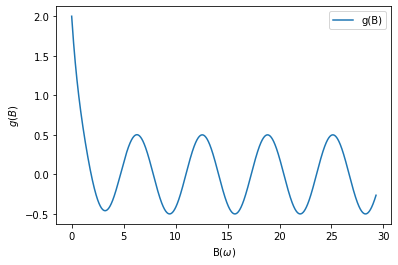

The first three frequencies are [40.98550454681846, 256.85177260214857, 719.1924007062759]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import * 
%matplotlib inline

density,E,b,h = 7850,2e11,25e-3,8e-3  # unit density:kg/m**3; E:Pa; A:m**3
A = b * h
I = b * h**3 / 12

# plotting
xmin, xmax = 0, 10000
x = np.linspace(xmin,xmax,100000)
B = np.sqrt(np.sqrt(x**2*density*A/(E*I)))
f = np.cos(B) * np.cosh(B) + 1
g = f * np.exp(-B)
plt.plot(B,g,label='g(B)')
plt.ylabel('$g(B)$')
plt.xlabel('B($\omega$)')
plt.legend()
plt.show()
# As we can see, the first three zero crossings occurs between [0,10].
# Since this function is oscilating, so we need first determine the first three sections where the sign changes.
def g(B):
    f = np.cos(B) * np.cosh(B) + 1
    gg = f * np.exp(-B)
    return gg

def bisection(f,left,right):
    # Carry out bisection algorithm to find solution between given section.
    # f is the input function; left and right is the two start side
    tolerance = 1e-15
    while abs(right-left)/right > tolerance:
        mid = (left + right) / 2
        if f(mid) == 0:
            break
        else:
            if f(mid)*f(right) < 0:
                left = mid
            else:
                right = mid
    return mid

gg,xx,result = [0],[0],[]  
for idx,x in enumerate(np.linspace(0.1,10.1,50)):
    gg.append(g(x))
    xx.append(x)
    if gg[idx+1] == 0:
        # In case I touch the root, although this is impossible at all.
        result.append(x)
    elif gg[idx]*gg[idx+1] < 0:
        B = bisection(g,xx[idx],xx[idx+1])
        result.append(B**2*np.sqrt(E*I/(density*A)))

print("The first three frequencies are {}".format(result))